# Business context:
- Bookworm is an online book renting service. They want to re-evaluate their marketing effort with available data across different media platform such as GG ads, Meta ads, YT ads, TV, ...
- Question: Which media platform is doing well, which is not? What will happen with sales given particular performance across channels?
- Task:
  1. EDA:
    - analyze current data to evaluate which metrics currently make most impact of sales.
  2. Predictive model:
    - Build a model predicting sales based on performance in many platforms.
    - Evaluate which features in the model (which media channel's metrics) contribute most to sales' outcome.

Variables (Sales):

    - "Dates_School_Holidays": number of holidays per week

    - "Google_Display_Impressions": impression from google display ads

    - "Meta_Impressions": impression from ads on Meta

    - "Google_Generic_Paid_Search_Impressions": impression from people seeing search result of BookWork by searching for generic terms (such as book renting service, book rent, ...)

    - "TV_GRP": Gross rating point (quantify size of audience impacted by a campaign) for TV ads
    
    - "Influencers_Views": views received from advertising using influencers

    - "Google_Brand_Paid_Search_Clicks": number of clicks from customers searching for brand related terms (such as BookWorm, Bookworm renting, Bookworm service, ...)

    - "Competitors Promotion": number of free-access days if purchasing service in that particular week, offered by Competitor

    - "Promotion": free access days if purchasing in that week by BookWorm (brand)

    - "YouTube_Impressions": Impression from ads on youtube



# Run_all

## Data overview function

In [ ]:
# Data transform and clean function
def data_trans(df):
  # Show data
  data_des = df.head()
  print('-'*50, '\n', data_des)

  print('-'*50)
  print(df.shape)
  print('-'*50)

  # Data type of col
  print('      _____DATA TYPE OF COL:_______')
  obj_cat = []
  num_cat = []
  date_cat = []
  bool_cat = []
  for col in df.columns:
    if df[col].dtypes == 'object' or df[col].dtypes == 'category':
      obj_cat.append(col)
    elif df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
      num_cat.append(col)
    elif df[col].dtypes == 'datetime64[ns]':
      date_cat.append(col)
    else:
      bool_cat.append(col)

  print(f'Category/Object column: {obj_cat}')
  print('')
  print(f'Numeric column: {num_cat}')
  print('')
  print(f'Date column: {date_cat}')
  print('')
  print(f'Other: {bool_cat}')


  # Check missing values
  print('-'*50)
  print('      _______MISSING VALUe:______')
  if df.isna().sum().any() == True:
    null = df[df.columns[df.isna().sum() > 0].tolist()].isna().sum()
    print(f'In {df.shape[0]} observations, there are missing values:')
    print(null.to_string())

  else:
    print('No missing value')

  print('-'*50)

  # Check for duplicate
  print('    _______DUPLICATES:______')
  def duplicated(df):
    identical_cols = {}
    visited = set()

    for i, col1 in enumerate(df.columns):
        if col1 in visited:
            continue
        duplicates = []
        for j, col2 in enumerate(df.columns):
            if col1 != col2 and col2 not in visited:
                if df[col1].equals(df[col2]):
                    duplicates.append(col2)
                    visited.add(col2)
        if duplicates:
            visited.add(col1)
            identical_cols[col1] = duplicates

    if identical_cols:
      print('____Duplciated columns (ref: rep_col) are:_____')
      print('')
      for ref_col, dup_cols in identical_cols.items():
          print(f"Replicated colum: {ref_col},{', '.join(dup_cols)}")
    else:
      print('No columns are duplicated.')

  # Replicated columns:
  duplicated(df)
  print('- -'*15)

  # Repli Rows
  if df.duplicated().sum() > 0:
    print(f'There are {df.duplicated().sum()} duplicate rows')
  else:
    print('No duplicate rows')

  print('-'*50)


  # Check outlier
  print('    _______OUTLIERS:______')
  print('    Note: outliers are counted based on IQR method')
  print('    If none appear, there is no outlier at all')
  # Hàm phát hiện outlier trong bảng tính
  def outlier_check(df):

    outlier = False
    from pandas.api.types import is_numeric_dtype

    df = pd.DataFrame(df)

    for col in df.columns:
      if not is_numeric_dtype(df[col]):
        continue

      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      i_list_lb = []
      i_list_ub = []
      for i in df[col]:
        if i < lower_bound:
          i_list_lb.append(i)
        if i > upper_bound:
          i_list_ub.append(i)

      i_list = i_list_lb + i_list_ub


      if i_list:
        print(f'{col}: LB ({len(i_list_lb)/df[col].count():.2%} below {lower_bound:,.2f}) and UB ({len(i_list_ub)/df[col].count():.2%} above {upper_bound:,.2f}). Total {len(i_list)} outlier.')
        print('')
      else:
        pass

  outlier_check(df)

## Loading

Overall, the data is cleaned in terms of no missing values, duplicates (rows and cols)

In [ ]:
import pandas as pd
# Spending on ads
df_spend = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/0. TM - python analysis và thuật toán/Capstone_buoi_12/CapstoneTM_Media_spend.xlsx')
df_spend.sort_values(by='Date', inplace=True)

In [ ]:

# Sales data (main)
df_sales = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/0. TM - python analysis và thuật toán/Capstone_buoi_12/Capstone_12_media&sales.xlsx')
# sort to make sure it follows chronological order
df_sales.sort_values(by='Date', inplace=True)

# rename cols
rename_dict = {
    "Accounts Subscriptions": "account_subscription",
    "Dates_School_Holidays": "school_holiday",
    "Google_Display_Impressions": "google_display_impression",
    "Meta_Impressions": "meta_impression",
    "Google_Generic_Paid_Search_Impressions": "google_generic_impression",
    "TV_GRP": "tv_grp_score",
    "Influencers_Views": "influencer_view",
    "Google_Brand_Paid_Search_Clicks": "google_brand_paid_click",
    "Competitors Promotion": 'competitor_promotion',
    "Promotion": 'promotion',
    "YouTube_Impressions": "youtube_impression"
}
df_sales.columns = df_sales.columns.map(lambda x: rename_dict.get(x, x))

# Ensure data type
df_sales[['account_subscription', 'google_display_impression',
       'meta_impression', 'google_generic_impression', 'influencer_view',
       'google_brand_paid_click', 'youtube_impression', 'school_holiday',
       'competitor_promotion', 'promotion']] = \
df_sales[['account_subscription', 'google_display_impression',
       'meta_impression', 'google_generic_impression', 'influencer_view',
       'google_brand_paid_click', 'youtube_impression', 'school_holiday',
       'competitor_promotion', 'promotion']].astype(int)

## 1. EDA


Grand conclusion:
- School holidays highly correlate with sales' sharp rise, displaying that sales tend to increase when students have long holidays (like summer break)
- Ads effort did contribute to sales growth as shown in Jan-2021; however, promotion (even from brand or competitor) shows little impact, which may be due to the irregularity of them compared to Ads frequency
- Cost-wise,
  + TV's cost is double Meta ads but only half the latter's correlation with account subs. This is an early sign that TV's ads might not work well for BookWorm.
  + YT is an effective channel: impression has good correlation with ads subs (4th) , its cost has good correlation with ads subs as well (2nd). But, cost stays rank 5th, meaning a very potential channel.
  + GG branded clicks has high correlation with account subs, but its cost does not. This means better cost strategy is available to BookWork.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Correlation
a = df_sales.drop(columns=['Date']).corr()[['account_subscription']].sort_values(by='account_subscription', ascending=False)
print(a[a['account_subscription']<1])

                           account_subscription
school_holiday                         0.670332
meta_impression                        0.656257
google_brand_paid_click                0.556048
youtube_impression                     0.434285
tv_grp_score                           0.249929
google_generic_impression              0.161973
promotion                              0.136785
influencer_view                        0.121636
google_display_impression             -0.008013
competitor_promotion                  -0.060382


At first sight,
- Dates_school_holiday has the highest correlation with AS, this can be intepreted as when people (students, especially) are in summer break, they are more likely to rent books online.
- Meta_impression: people confronting ads in Meta platforms tend to subscirbe more
- Google_brand_paid_search_clicks: people, searching for book renting service, are more likely to buy when they click on such paid ads.
- Youtube impression: people are more likely to buy when they confront brand on Youtube

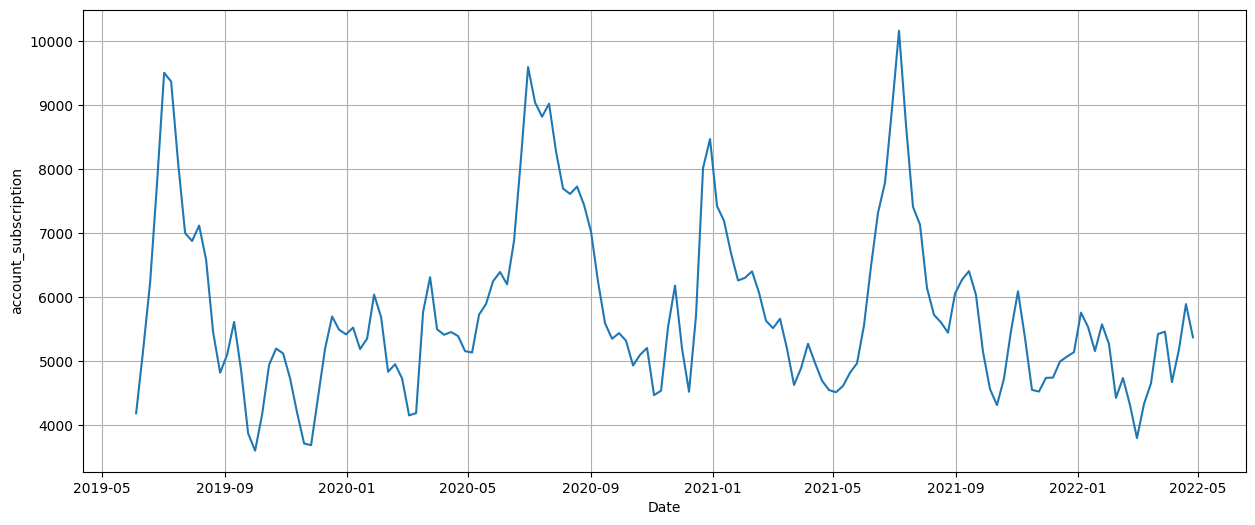

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(data=df_sales, x='Date', y='account_subscription')
plt.grid(True)

- Noticeably, Subscriptions always peak somewhere in June to July, which is summer break. Possibly, this is a time when many students subscribe for books to read during their free time
- Also, a peak is noticed around Jan 2021, which is irregular given the low sales in Jan every year.
- This could be a sign of potential outliers due to random chance (for some reason, people subscribe more in that particular month, which is not a pattern)

Media performance

<Axes: xlabel='Date', ylabel='youtube_impression'>

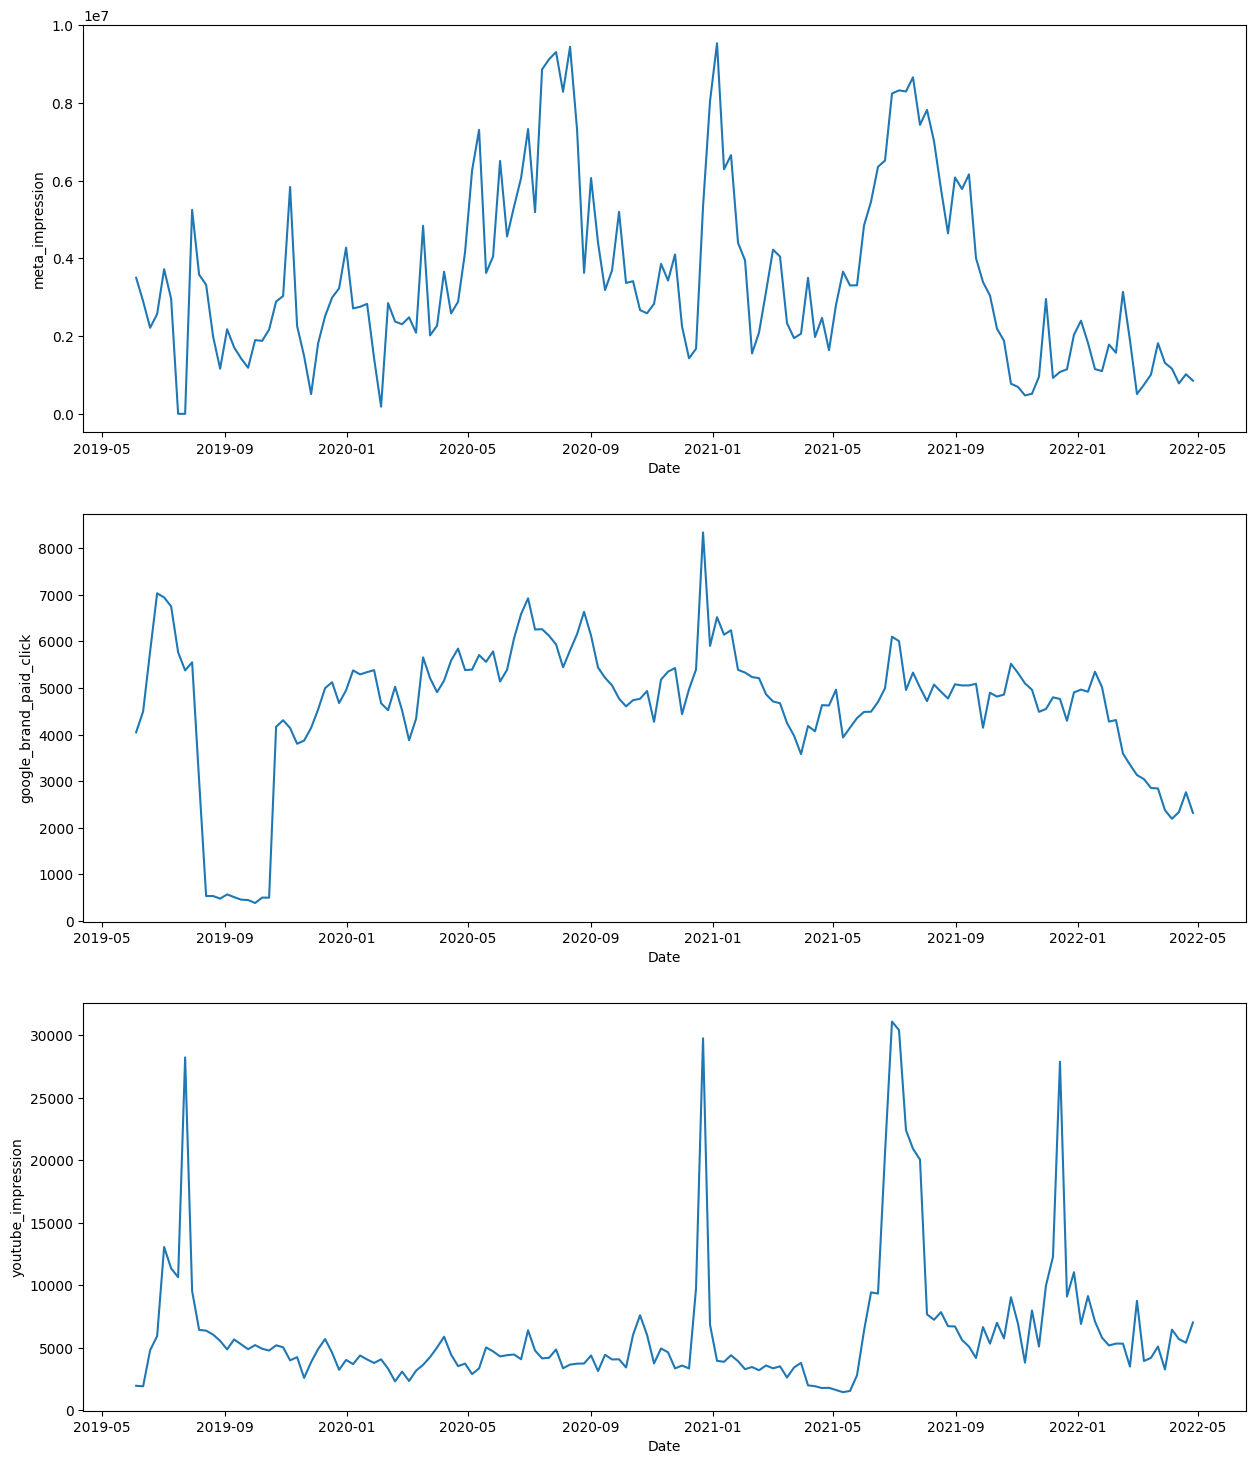

In [ ]:
fig, axes = plt.subplots(3,1, figsize = (15,18))
sns.lineplot(data=df_sales, x='Date', y='meta_impression', ax= axes[0])
sns.lineplot(data=df_sales, x='Date', y='google_brand_paid_click', ax=axes[1])
sns.lineplot(data=df_sales, x='Date', y='youtube_impression', ax=axes[2])

Break time:
- number of days off by week
- summertime is btw June - July where days off sustain at 7 for many weeks

<Axes: xlabel='Date', ylabel='school_holiday'>

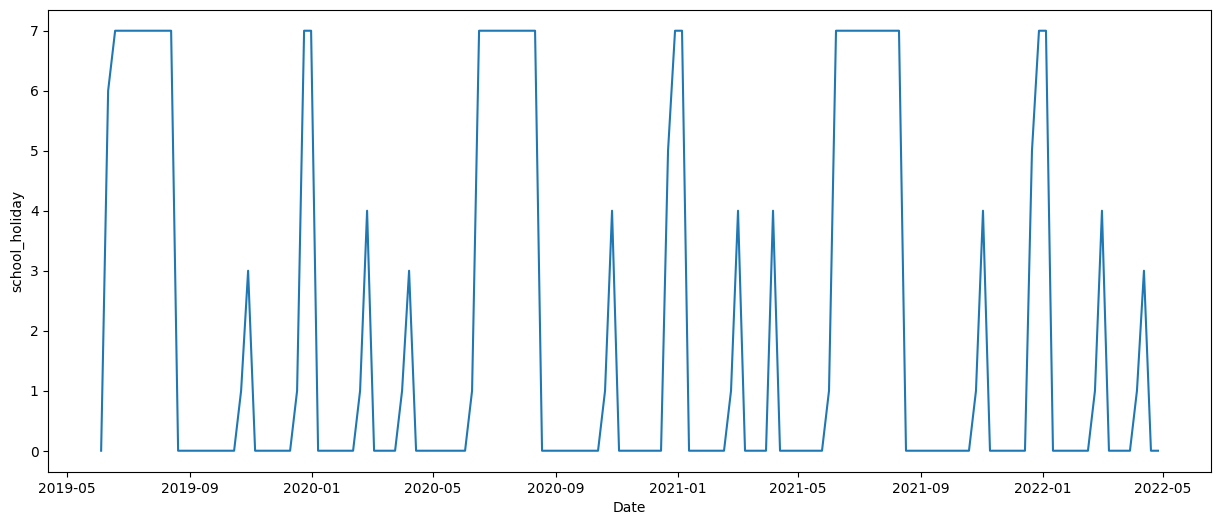

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(data=df_sales, x='Date', y='school_holiday')

The 3 charts explain:
- Jan 2021 is when BookWorm receives much attention on Youtube, Meta, and Google_paid_search, resulting in high conversion
- The charts also confirm high impressions and clicks during summer break where students have the longest break time

<Axes: xlabel='Date', ylabel='promotion'>

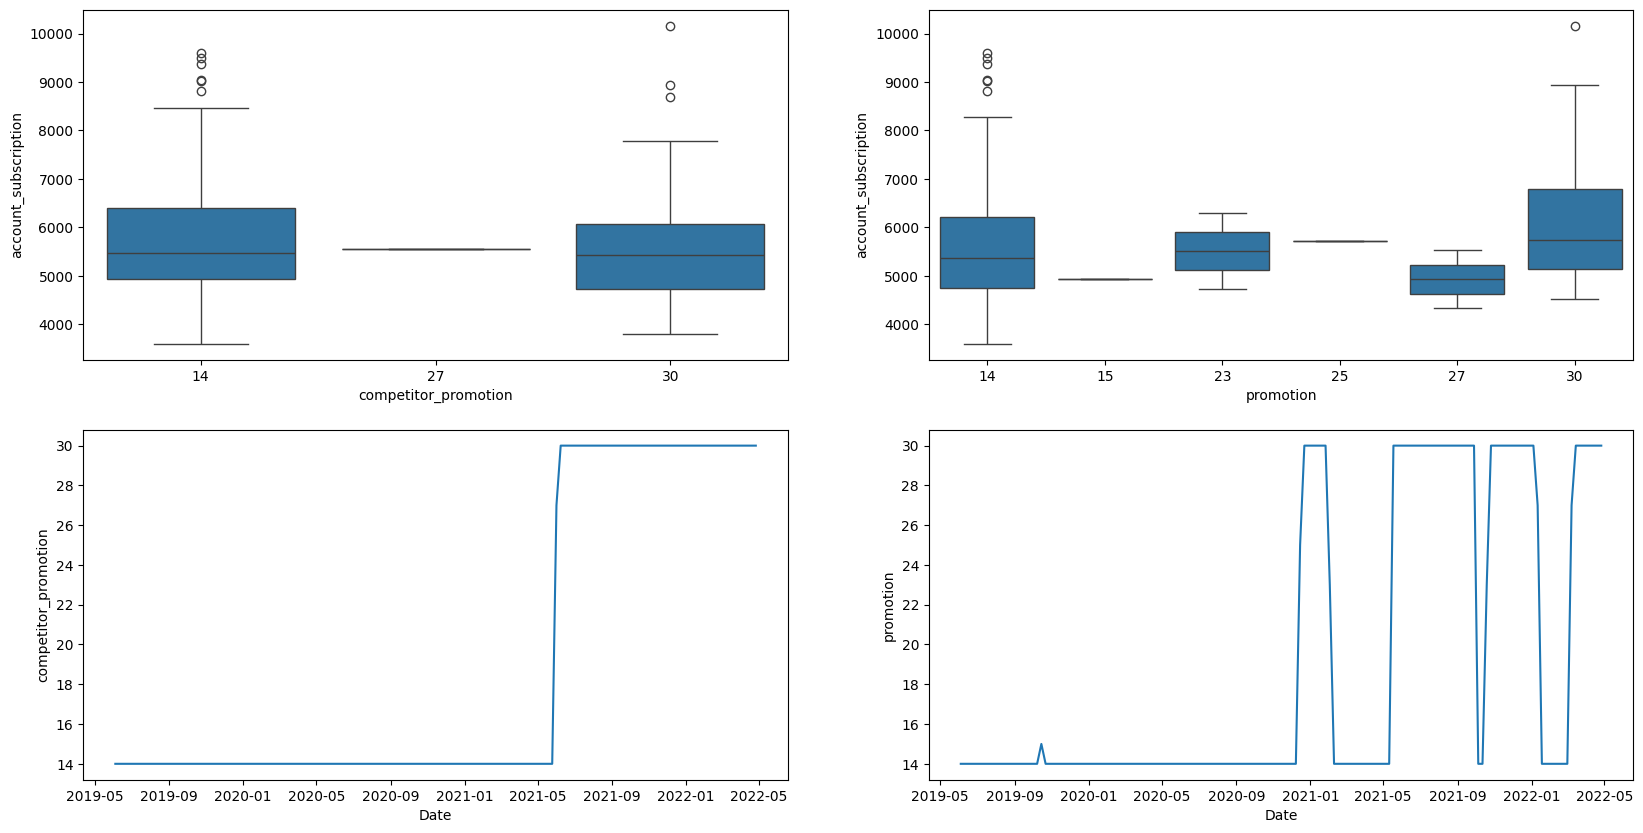

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (20,10))
sns.boxplot(data=df_sales, x='competitor_promotion', y='account_subscription', ax = ax[0, 0])
sns.boxplot(data=df_sales, x='promotion', y='account_subscription', ax=ax[0,1])
sns.lineplot(data=df_sales, x='Date', y='competitor_promotion', ax=ax[1,0])
sns.lineplot(data=df_sales, x='Date', y='promotion', ax=ax[1,1])

- There is no clear pattern between competitor promotion or brand promotion and account subscription
- The effect is in fact not significant competitor-sales (-0.06) and promotion-sale (13.6)
- Hypothesis-wise, Bookwork's promotion positive impact on sales is absolutely larger than competitor's promotion negative impact on sales because BookWork did act more promptly, offering huge discounts (>14 days) way before its competitor. This possibly attracted many to the brand (brand love)

Media effectiveness

____________Total cost by channel______________
TV Cost                            6.868890e+07
Meta Cost                          3.576161e+07
Google Generic Paid Search Cost    2.516102e+07
Google Branded Paid Search Cost    1.733241e+06
YouTube Cost                       9.723242e+05
Google Display Cost                2.519793e+05
Influencers Cost                   1.714200e+04
dtype: float64
--------------------------------------------------
____________Correlation of COST with Account Subs_____________
Meta Cost                          0.553284
YouTube Cost                       0.434284
TV Cost                            0.263690
Google Generic Paid Search Cost    0.146303
Influencers Cost                   0.121771
Google Branded Paid Search Cost    0.008917
Google Display Cost               -0.043635
Date                              -0.112150
Name: account_subscription, dtype: float64
--------------------------------------------------


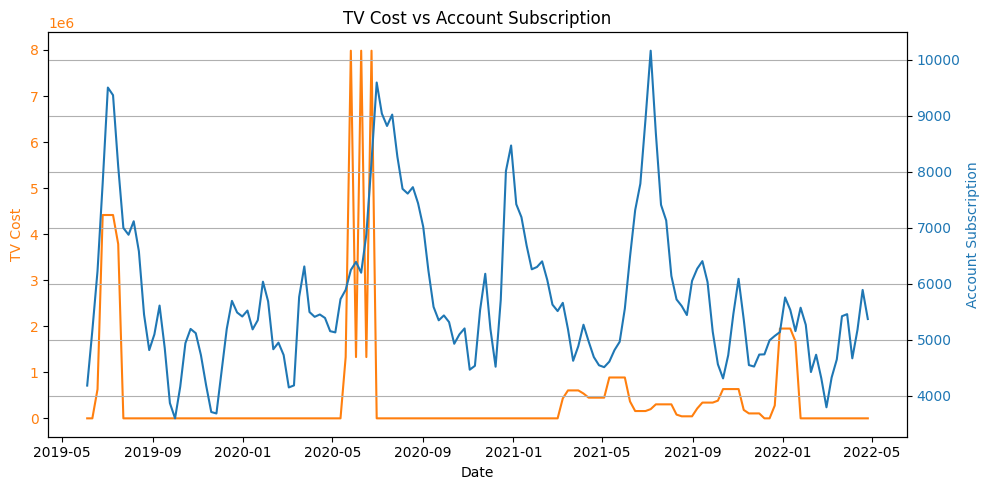

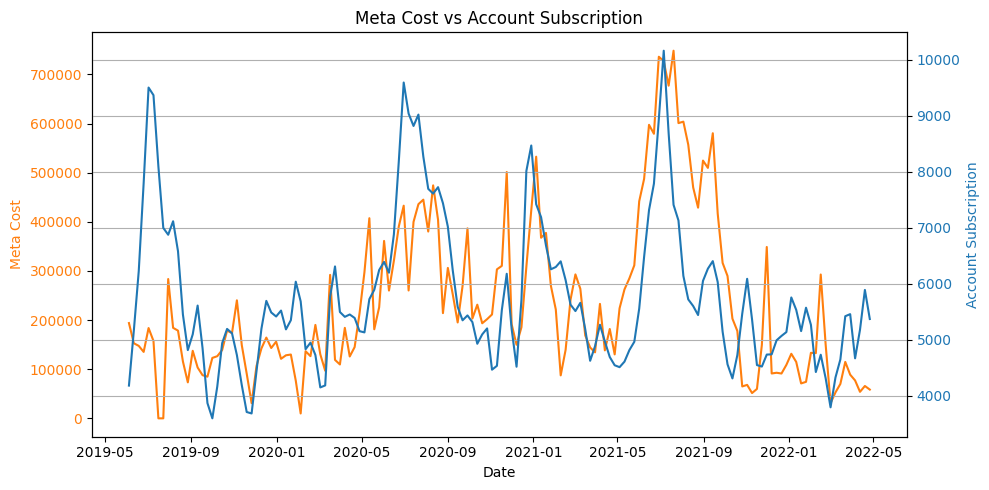

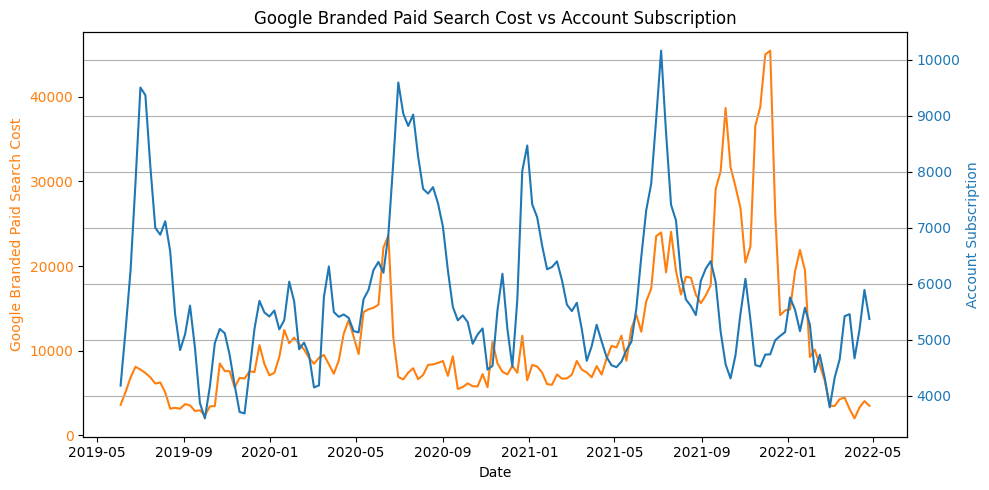

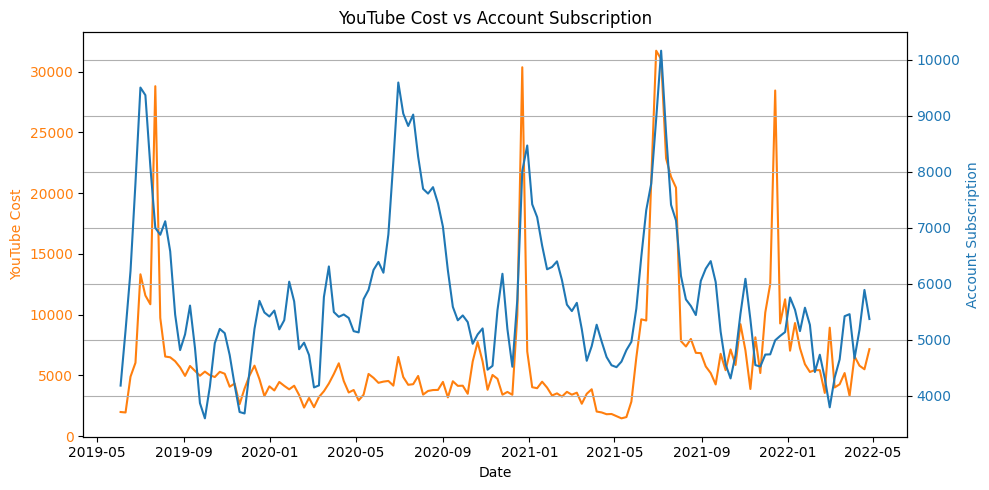

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

print('____________Total cost by channel______________')
print(
    df_spend.drop(columns=['Date']).sum().sort_values(ascending=False)
)

print("-"*50)

print('____________Correlation of COST with Account Subs_____________')
media_spend = df_spend.merge(df_sales[['Date','account_subscription']],on='Date',how='left')
media_spend_cor = media_spend.corr()['account_subscription'].drop('account_subscription')
media_spend_cor_sorted = media_spend_cor.sort_values(ascending=False)
print(media_spend_cor_sorted)

print("-"*50)

# Merge both DataFrames on 'Date'
df_merged = pd.merge(df_sales, df_spend, on='Date')

# Make sure Date is datetime
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

# List of spend columns to compare
spend_columns = [
    'TV Cost',
    'Meta Cost',
    'Google Branded Paid Search Cost',
    'YouTube Cost'
]

# Plot each pair with secondary axis
for col in spend_columns:
    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.set_xlabel('Date')
    ax1.set_ylabel(col, color='tab:orange')
    ax1.plot(df_merged['Date'], df_merged[col], label=col, color='tab:orange')
    ax1.tick_params(axis='y', labelcolor='tab:orange')

    ax2 = ax1.twinx()  # Create secondary axis
    ax2.set_ylabel('Account Subscription', color='tab:blue')
    ax2.plot(df_merged['Date'], df_merged['account_subscription'], label='Account Subscription', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    plt.title(f'{col} vs Account Subscription')
    fig.tight_layout()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


Comment:
- Tv is double the cost of Meta, but its cost correlates not as well as Meta (half the correlation Meta has with account subs). Also, cost distribution is not balance like Meta (most has been spent during May 2020) while Meta's cost is spread out and aligns well with increase in account subs.
- Youtube is also significant because despite 4th rank in cost, it ranks 2nd in correlation with account subs. This seems quite cost-effective. However, further research needs conducting before deciding to invest more in this channel or not.
- Noticeably, though GG branded search clicks highly correlate with account subs, its cost does not. Looking at the chart, this could be due to Bookworm spending on this ads in wrong time (when students' break ended), reducing its effect

## 2. Predictive model

In this section:
- A predictive model is built to predict future sales based on data collected about media performance
- Evaluate the importance of each features so that BO can understand key factors to pay attention to in their marketing effort

Note: I do not treat outliers because the rise between 2020-11-01 to 2021-03-01 was due to stronger marketing effort, not from external or unexpected events

### Hyper-param tuning and model selection

Final choice:
- Model: ARIMA
- Hyperparam
  + p = 3
  + d = 0
  + q = 3

In [ ]:
# index the date col
df_sales.set_index('Date', inplace=True)

#### OLS


- Basic and high intepretability

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error

df_ols = df_sales.copy()

# Cross_val
tsc_ols = TimeSeriesSplit(n_splits = 5, test_size=30)

# Exe
r2 = []
rmse=[]
mape = []
aic=[]
bic=[]
for train_ind, val_ind in tsc_ols.split(df_ols):
  X_tr_ols, y_tr_ols = df_ols.drop(columns='account_subscription').iloc[train_ind], df_ols['account_subscription'].iloc[train_ind]
  X_val_ols, y_val_ols = df_ols.drop(columns='account_subscription').iloc[val_ind], df_ols['account_subscription'].iloc[val_ind]

  # scaler
  scaler = StandardScaler()
  X_tr_ols_scaled = scaler.fit_transform(X_tr_ols)
  X_val_ols_scaled = scaler.transform(X_val_ols)

  # Add constant
  X_val_ols_scaled = sm.add_constant(X_val_ols_scaled, has_constant='add')
  X_tr_ols_scaled = sm.add_constant(X_tr_ols_scaled, has_constant='add')


  # Fit into OLS model
  ols_model = sm.OLS(y_tr_ols, X_tr_ols_scaled).fit()
  y_ols_pred = ols_model.predict(X_val_ols_scaled)

  # Eval
  r2_score = ols_model.rsquared
  rmse_ols = root_mean_squared_error(y_val_ols, y_ols_pred)
  mape_ols = mean_absolute_percentage_error(y_val_ols, y_ols_pred)
  aic_score = ols_model.aic
  bic_score = ols_model.bic

  r2.append(r2_score)
  rmse.append(rmse_ols)
  mape.append(mape_ols)
  aic.append(aic_score)
  bic.append(bic_score)

print('-'*50)
print(f'R2: {stat.mean(r2)}')
print(f'RMSE: {stat.mean(rmse)}')
print(f'MAPE: {stat.mean(mape)}')
print(f'AIC: {stat.mean(aic)}')
print(f'BIC: {stat.mean(bic)}')

--------------------------------------------------
R2: 0.8407846508923409
RMSE: 8383.679899410432
MAPE: 0.9003465239785123
AIC: 973.6131901209372
BIC: 991.4886130213621


Best result:
- RMSE: 8383
- MAPE: 90
- AIC: 973
- BIC: 991


In [ ]:
# Check for hetereokedasticity

X_tr_ols, y_tr_ols = df_ols[:-30].drop(columns='account_subscription'), df_ols[:-30]['account_subscription']
X_val_ols, y_val_ols = df_ols[-30:].drop(columns='account_subscription'), df_ols[-30:]['account_subscription']

# Fit into model
results = sm.OLS(y_tr_ols, X_tr_ols_scaled).fit()

# Testing
from statsmodels.stats.diagnostic import het_breuschpagan

X_bp = sm.add_constant(results.fittedvalues)
bp_test = het_breuschpagan(results.resid, X_bp)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("\nBreusch-Pagan test on original data:")
print(dict(zip(labels, bp_test)))


Breusch-Pagan test on original data:
{'Lagrange multiplier statistic': np.float64(8.74755363996656), 'p-value': np.float64(0.003100176631465043), 'f-value': np.float64(9.268730791553363), 'f p-value': np.float64(0.002865312198129714)}


Further checking confirms hetereokedasticity:
- P-vale < 0.05
- What to do: Log-transform the input Y-var

#### ARIMA

Why Arima:
- Arima is flexible
- Assume constant stationarity but have Integration (I part) to treat if stationary condition is not satisfied



In [ ]:
# Check for stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_sales['account_subscription'])
print('p-value: %f' % result[1])

p-value: 0.002376


- p-value < 0.05, so the data is stationary, no upward or downard trend
- No integreated (differencing) needed: I = 0
- No need to do differencing before applying ACF and PACF test

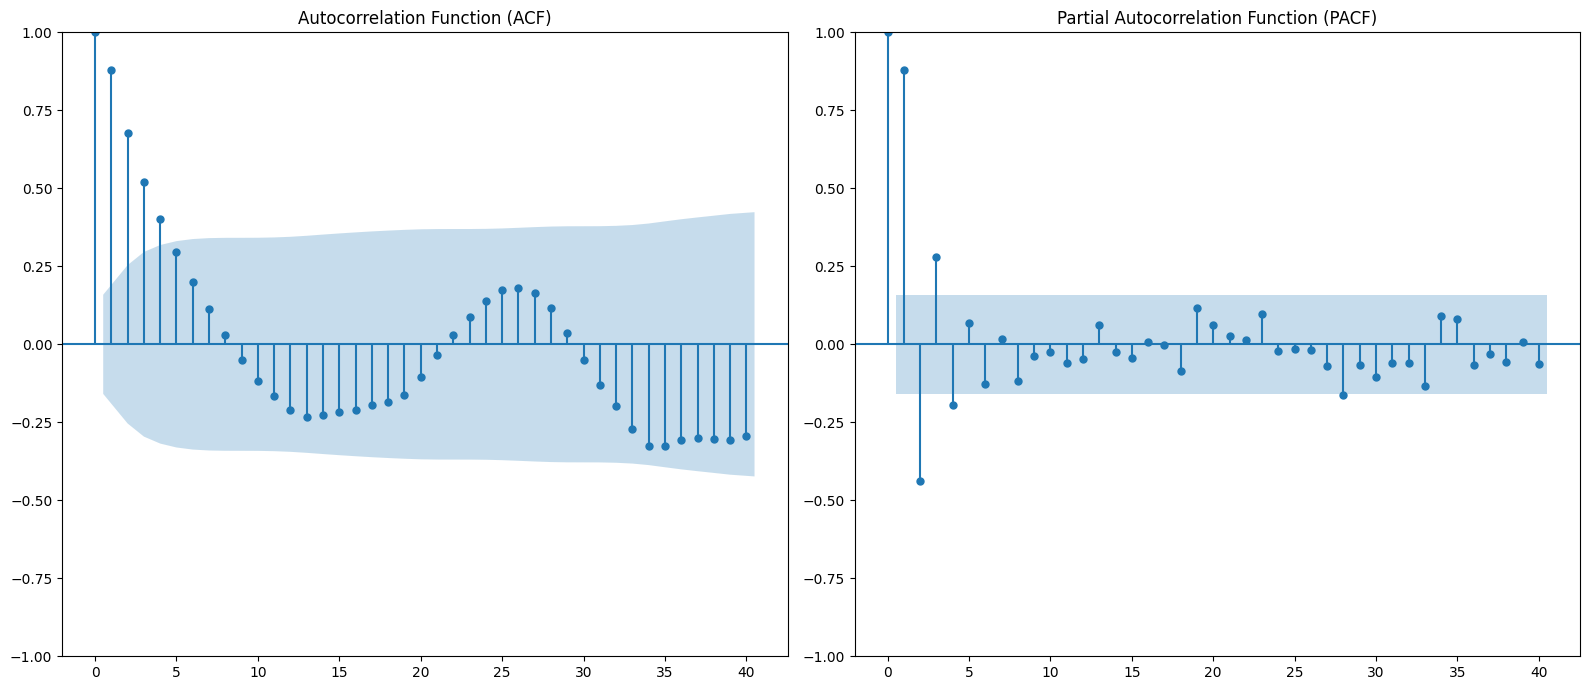

In [ ]:
# ACF and PACF to find p and q terms of ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
plot_acf(df_sales['account_subscription'], lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(df_sales['account_subscription'], lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

Looking at both charts, I will cross-validate on:
- q = (1,2,3)
- p = (1,2,3)
- d = 0

In [ ]:
# Cross validation
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
import statistics as stat
import warnings
warnings.filterwarnings("ignore")

# data prep
df_sales_arima = df_sales.copy()
end_date = df_sales_arima.index.max() + pd.Timedelta(days=7)
df_sales_arima.index = pd.date_range(start=df_sales_arima.index.min(), end=end_date, freq='W')

# Cross_val setup
tscv = TimeSeriesSplit(n_splits = 5, test_size=30)

# Cross_val exe
for p in range(0, 4):
    for q in range(0, 4):
      rmse_list =[]
      aic_list = []
      bic_list = []
      for train_idx, val_idx in tscv.split(df_sales_arima):
        X_train, y_train = df_sales_arima.drop(columns='account_subscription').iloc[train_idx], df_sales_arima['account_subscription'].iloc[train_idx]
        X_val, y_val = df_sales_arima.drop(columns='account_subscription').iloc[val_idx], df_sales_arima['account_subscription'].iloc[val_idx]

        # Log transform
        y_log = np.log(y_train)

        # Fit into ARIMA model
        model = ARIMA(endog= y_log, order=(p, 0, q))
        fitted_model = model.fit()
        forecast = fitted_model.forecast(steps=len(X_val))
        forecast = np.exp(forecast)

        rmse = root_mean_squared_error(y_val, forecast)
        mape = mean_absolute_percentage_error(y_val, forecast)
        aic = fitted_model.aic
        bic = fitted_model.bic

        rmse_list.append(rmse)
        aic_list.append(aic)
        bic_list.append(bic)

      rmse_avg = stat.mean(rmse_list)

      aic_avg = stat.mean(aic_list)
      bic_avg = stat.mean(bic_list)

      print('-'*50)
      print(f'p: {p}, q: {q}')
      print(f'RMSE: {rmse_avg}')
      print(f'MAPE: {mape}')
      print(f'AIC: {aic_avg}')
      print(f'BIC: {bic_avg}')


--------------------------------------------------
p: 0, q: 0
RMSE: 1419.3968477614585
MAPE: 0.18514984187784536
AIC: -1.6876035643972196
BIC: 1.3571272716776048
--------------------------------------------------
p: 0, q: 1
RMSE: 1410.1927049951692
MAPE: 0.1787305246605117
AIC: -72.83056488352979
BIC: -68.26346862941756
--------------------------------------------------
p: 0, q: 2
RMSE: 1408.0909352934962
MAPE: 0.17483955850098826
AIC: -109.52372194659472
BIC: -103.43426027444507
--------------------------------------------------
p: 0, q: 3
RMSE: 1386.3391826273485
MAPE: 0.1606967070931305
AIC: -128.02362804855719
BIC: -120.41180095837014
--------------------------------------------------
p: 1, q: 0
RMSE: 1396.177164744926
MAPE: 0.13826064936388402
AIC: -93.25420970626566
BIC: -88.68711345215343
--------------------------------------------------
p: 1, q: 1
RMSE: 1393.9793034617019
MAPE: 0.1440235284176625
AIC: -129.91194464904007
BIC: -123.82248297689041
-------------------------------

Optimal: q=3 and p =3 with:
- rmse: 1369
- mape: 13
- aic: -132
- bic = -120


Comment:
- Even without Log_transform, we can see OLS is worse than ARIMA in terms of MAPE and RMSE
- In fact, testing shows rmse and mape does not change much before and after log_transform in arima. SO I will assume the same in OLS
- Plus, the distance is too much:
  + OLS: rmse = 8383, mape = 90
  + ARIMA: rmse = ~1390, mape = ~13.5 across hyperparam
  + aic and bic are not comparable because log_transform changes these much (but it's enough with rmse and mape)

#### ARIMAX

- The arimax model will be set as sarimax with no seasonaility
- And add exog argument

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox
warnings.filterwarnings("ignore")

# data prep
df_sales_arimaxx = df_sales.copy()
end_date2 = df_sales_arimaxx.index.max() + pd.Timedelta(days=7)
df_sales_arimaxx.index = pd.date_range(start=df_sales_arimaxx.index.min(), end=end_date2, freq='W')

# Cross_val setup
tsc_sa = TimeSeriesSplit(n_splits = 5, test_size=30)

# Cross_val exe
for p in range(0,3):
  for q in range(0,3):
    rmse_list_arx =[]
    aic_list_arx = []
    bic_list_arx = []
    mape_list_arx =[]
    for train_idx, val_idx in tsc_sa.split(df_sales_arimaxx):
      X_tr, y_tr = df_sales_arimaxx.drop(columns='account_subscription').iloc[train_idx], df_sales_arimaxx['account_subscription'].iloc[train_idx]
      X_val_arx, y_val_arx = df_sales_arimaxx.drop(columns='account_subscription').iloc[val_idx], df_sales_arimaxx['account_subscription'].iloc[val_idx]

      # Fit into ARIMA model
      model_arx = SARIMAX(endog= y_tr, #np.log(y_tr)
                      exog = X_tr,
                      order=(p,0,q),
                      seasonal_order = (0,0,0,0))
      arimax_model = model_arx.fit()
      forecast_arx = arimax_model.forecast(steps=len(X_val_arx), exog = X_val_arx)
      #forecast_arx = np.exp(forecast_arx)


      rmse = root_mean_squared_error(y_val_arx, forecast_arx)
      aic = arimax_model.aic
      bic = arimax_model.bic
      mape_ax = mean_absolute_percentage_error(y_val_arx, forecast_arx)

      rmse_list_arx.append(rmse)
      mape_list_arx.append(mape_ax)
      aic_list_arx.append(aic)
      bic_list_arx.append(bic)


    rmse_avg_arx = stat.mean(rmse_list_arx)
    mape_arx = stat.mean(mape_list_arx)
    aic_avg_arx = stat.mean(aic_list_arx)
    bic_avg_arx = stat.mean(bic_list_arx)

    print('-'*50)
    #print(f'P: {P_}, Q: {Q_}, D: {D}')
    print(f'RMSE: {rmse_avg_arx}')
    print(f'MAPE: {mape_arx}')
    print(f'AIC: {aic_avg_arx}')
    print(f'BIC: {bic_avg_arx}')


--------------------------------------------------
RMSE: 5231.850730188442
MAPE: 0.6099808046917894
AIC: 1219.512815601099
BIC: 1236.2588351995105
--------------------------------------------------
RMSE: 5182.90808489733
MAPE: 0.6045492615220502
AIC: 996.3618467971971
BIC: 1014.6302318136461
--------------------------------------------------
RMSE: 5178.126780633991
MAPE: 0.6040099637741178
AIC: 992.9339063380955
BIC: 1012.7246567725819
--------------------------------------------------
RMSE: 5085.769551355792
MAPE: 0.5858705354796843
AIC: 986.4755463098029
BIC: 1004.7439313262519
--------------------------------------------------
RMSE: 5063.954401145936
MAPE: 0.5815569370576112
AIC: 986.0182030287328
BIC: 1005.8089534632192
--------------------------------------------------
RMSE: 5105.608602405417
MAPE: 0.5893132327683469
AIC: 988.4357506210156
BIC: 1009.7488664735392
--------------------------------------------------
RMSE: 5049.134436743044
MAPE: 0.5793681138879236
AIC: 985.4621642132

Comment:
- With all the independent vars in place, the model even performs worst than merely predicting using past values (ARIMA)
- With log_transform, the model seems worse

#### SARIMA

SARIMA:
- There is some trend withint the data: every q year in summer, sales will rise (when students have summer break).Though there is a sudden rise in Jan 2021 due to stronger marketing effort
- D is set to 0 because there is no trend within the season (mean, median of each season stays same)
- P and Q is selected similarly based on the ACF and PACF model, so range 0 to 4 will be applied

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")

# data prep
df_sales_sarima = df_sales.copy()
end_date2 = df_sales_sarima.index.max() + pd.Timedelta(days=7)
df_sales_sarima.index = pd.date_range(start=df_sales_sarima.index.min(), end=end_date2, freq='W')

# Cross_val setup
tsc_sa = TimeSeriesSplit(n_splits = 5, test_size=30)

# Cross_val exe
for P_ in range(0,4):
  for Q_ in range(0,4):
    rmse_list =[]
    aic_list = []
    bic_list = []
    mape_list =[]
    try:
      for train_idx, val_idx in tsc_sa.split(df_sales_sarima):
        X_train, y_train = df_sales_sarima.drop(columns='account_subscription').iloc[train_idx], df_sales_sarima['account_subscription'].iloc[train_idx]
        X_val, y_val = df_sales_sarima.drop(columns='account_subscription').iloc[val_idx], df_sales_sarima['account_subscription'].iloc[val_idx]


          # Fit into ARIMA model
        model = SARIMAX(endog= np.log(y_train),
                      order=(2, 0, 2),
                      seasonal_order = (P_, 0 , Q_, 51))
        fitted_model = model.fit()
        forecast = fitted_model.forecast(steps=len(X_val))
        forecast = np.exp(forecast)

        rmse = root_mean_squared_error(y_val, forecast)
        aic = fitted_model.aic
        bic = fitted_model.bic
        mape_sa = mean_absolute_percentage_error(y_val, forecast)

        rmse_list.append(rmse)
        mape_list.append(mape_sa)
        aic_list.append(aic)
        bic_list.append(bic)

      rmse_avg = stat.mean(rmse_list)
      mape = stat.mean(mape_list)
      aic_avg = stat.mean(aic_list)
      bic_avg = stat.mean(bic_list)

      print('-'*50)
      print(f'P: {P_}, Q: {Q_}')
      print(f'RMSE: {rmse_avg}')
      print(f'MAPE: {mape}')
      print(f'AIC: {aic_avg}')
      print(f'BIC: {bic_avg}')
    except Exception as e:
      continue

--------------------------------------------------
P: 0, Q: 0
RMSE: 1415.4242258719005
MAPE: 0.18546790645610287
AIC: -113.93640897897222
BIC: -106.32458188878516
--------------------------------------------------
P: 0, Q: 1
RMSE: 1187.6486266317825
MAPE: 0.15887596718235616
AIC: -112.61094196206632
BIC: -103.47674945384185
--------------------------------------------------
P: 0, Q: 2
RMSE: 1297.8393354294233
MAPE: 0.17298085133568755
AIC: -109.21215810459267
BIC: -98.55560017833079
--------------------------------------------------
P: 0, Q: 3
RMSE: 1290.312272663073
MAPE: 0.1656381996680196
AIC: -107.41552347310629
BIC: -95.23660012880698
--------------------------------------------------
P: 1, Q: 0
RMSE: 1227.6625180402666
MAPE: 0.15818255198251271
AIC: -112.74739018837738
BIC: -103.61319768015291
--------------------------------------------------
P: 1, Q: 1
RMSE: 1373.4071883747988
MAPE: 0.17269648308279292
AIC: -110.00565524717007
BIC: -99.34909732090819
---------------------------

Comment:
- With slightly better RMSE in general, SARIMA performs slightly worse in MAPE
- Plus, their AIC and BIC are worst, showing less suitability



#### Sarimax
- Learning from arimax/arima case, I imply that sarimax may hardly outperform sarima
- So i'll not proceed with this model

#### Why not Deep learning method such as LSTM?

- Small dataset: potentially cause overfitting
- Deep learning is mostly reserved for complicated dataset with complicated pattern. But the data here has quite stable and predictable pattern

### Main model

In [72]:
import numpy as np
# Data prep
df_sales_ori = df_sales.copy()

# Set up package
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
import statistics as stat
import warnings
warnings.filterwarnings("ignore")

# Train test split (indx)
media_train = df_sales_ori[:-30]
media_val = df_sales_ori[-30:]

# Run the model
final_model = ARIMA(endog= np.log(media_train['account_subscription']), order=(3, 0, 3))
fitted_model = final_model.fit()
print(fitted_model.summary())

                                SARIMAX Results                                 
Dep. Variable:     account_subscription   No. Observations:                  122
Model:                   ARIMA(3, 0, 3)   Log Likelihood                 142.781
Date:                  Sat, 12 Jul 2025   AIC                           -269.563
Time:                          11:08:51   BIC                           -247.131
Sample:                      06-04-2019   HQIC                          -260.452
                           - 09-28-2021                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6316      0.071    121.163      0.000       8.492       8.771
ar.L1          0.3751      0.223      1.685      0.092      -0.061       0.811
ar.L2         -0.4179      0.205    

Intepretation of result:
- Summary result:
  + Statistically significant base level of 8.63
  + While forcast error (ma.L1, ma.L2, ma.L3) all significantly have positive impact on current value, the previous time-step values (ar.L1, ar.L2, ar.L3) did not agree with each other
  + Indeed, while ar.L2 has negative impact on current value, ar.L3 has positive one.
  + sigma2 representing residual variance is small and significant (0.0055 with p-val < 0.05) -> a good model
- Diagnostic test:
  + Prob(Q) > 0.05, indicating residuals are independant and resemble random noise, in turn indicating no auto-correlation (this is good because it helps satisfy assumption of a good time-series model, which is residuals are like white noise)
  + JB > 0.05 indicates residuals are normally distributted, a key component to satisfy assumptions of time-series model
  + Hetereokedasticity > 0 .05 (good) means the variance is residual is constant over time, this ensures reliability of model over time.